# 911 Calls Capstone Project

# Data Setup

### Importing numpy and pandas

In [89]:
import numpy as np
import pandas as pd

### Importing visualisation libraries

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

### Reading csv file and storing as dataframe named data

In [2]:
data = pd.read_csv('911.csv')

### Checking the info of the data

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   lat          99492 non-null  float64       
 1   lng          99492 non-null  float64       
 2   desc         99492 non-null  object        
 3   zip          86637 non-null  float64       
 4   title        99492 non-null  object        
 5   timeStamp    99492 non-null  datetime64[ns]
 6   twp          99449 non-null  object        
 7   addr         98973 non-null  object        
 8   e            99492 non-null  int64         
 9   Reason       99492 non-null  object        
 10  timestamp    99492 non-null  datetime64[ns]
 11  Hour         99492 non-null  int64         
 12  Month        99492 non-null  int64         
 13  Day of Week  99492 non-null  object        
 14  data         99492 non-null  object        
 15  date         99492 non-null  object        
dtypes: d

### Checking the head of the data

In [4]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


# Basic Questions

### What are the top 5 zipcodes for 911 calls?

In [5]:
data['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

### What are the top 5 townships (twp) for 911 calls?

In [6]:
data['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

### How many unique title codes are there?

In [7]:
data['title'].nunique()

110

# Creating new features

### Creating a new column named Reasons after extracting the departments from the title column

In [9]:
data['Reason'] = data['title'].apply(lambda title: title.split(":")[0])

In [10]:
data['Reason']

0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
          ...   
99487    Traffic
99488    Traffic
99489        EMS
99490        EMS
99491    Traffic
Name: Reason, Length: 99492, dtype: object

### Finding the most common Reason for 911 call based off of this new Column?

In [11]:
data['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

### Plotting a countplot using seaborn of 911 calls by Reason

<AxesSubplot:xlabel='Reason', ylabel='count'>

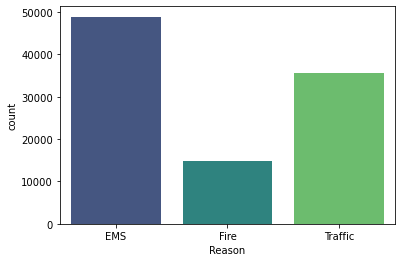

In [12]:
sns.countplot(x='Reason', data=data, palette='viridis')

### Now we will check the datatype of the timeStamp column 

In [13]:
type(data['timeStamp'].iloc[0])

str

### Now as we can see it is of type String. So, we will change it to dateTime Objects using pd.to_datetime

In [20]:
data['timeStamp'] = pd.to_datetime(data['timeStamp'])

### Now we will create 3 new Columns namely Hour, Month, and Day of Week using apply function on the datatime objects created above

In [21]:
data['Hour'] = data['timeStamp'].apply(lambda time: time.hour)
data['Month'] = data['timeStamp'].apply(lambda time: time.month)
data['Day of Week'] = data['timeStamp'].apply(lambda time: time.dayofweek)

### Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week: 

    "dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}"

In [22]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
data['Day of Week'] = data['Day of Week'].map(dmap)

### Plotting a countplot using seaborn of the column Day of Week based off the Reason column

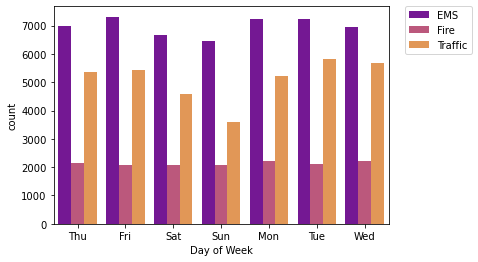

In [33]:
sns.countplot(x='Day of Week', data=data, hue='Reason', palette='plasma')

plt.legend(bbox_to_anchor=(1.05,1),loc=2, borderaxespad=0.)

### Plotting a countplot using seaborn of the column Month based off the Reason column

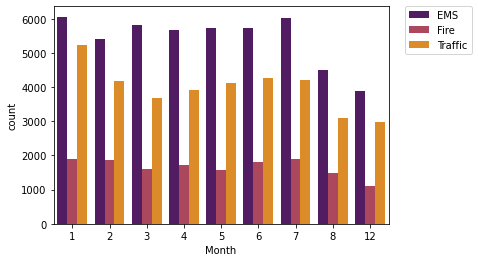

In [35]:
sns.countplot(x='Month', data=data, hue='Reason', palette='inferno')

plt.legend(bbox_to_anchor=(1.05,1),loc=2, borderaxespad=0.)

### As we have seen above it was missing some months, so we have to work on it.
### Firstly we will groupby our data by the Month column using count() for aggregation

In [92]:
byMonth = data.groupby('Month').count()
byMonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,timestamp,Hour,Day of Week,data,date
Month,,,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969,7969,7969,7969


### Creating simple plot off of the dataframe indicating the count of the calls per month

<AxesSubplot:xlabel='Month'>

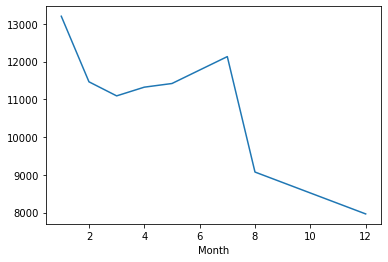

In [40]:
byMonth['twp'].plot()

### Using seaborn's lmplot() creating a linear fit on the number of calls per month.

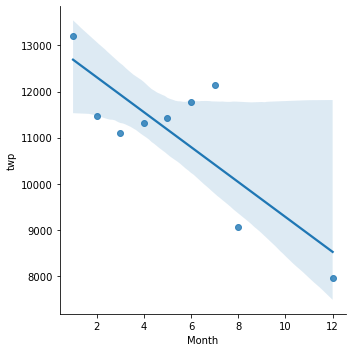

In [41]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

### Creating new Column date that contains the date from the timeStamp column.

In [51]:
data['date'] = data['timeStamp'].apply(lambda t : t.date())

### Groupby the column date aggregating with the count() and plotting the count of 911 calls

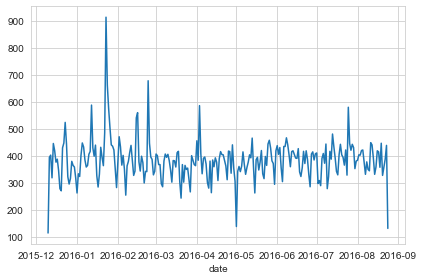

In [93]:
data.groupby('date').count()['twp'].plot()
plt.tight_layout()

### Recreating this plot but creating 3 separate plots with each plot with diffrent Reason for the 911 call

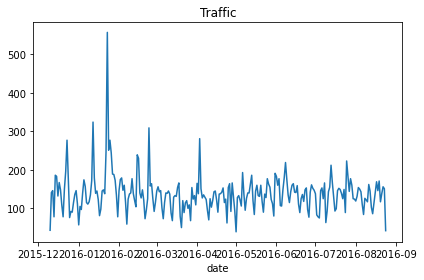

In [63]:
data[data['Reason'] == 'Traffic'].groupby('date').count()['twp'].plot()
plt.title("Traffic")
plt.tight_layout()

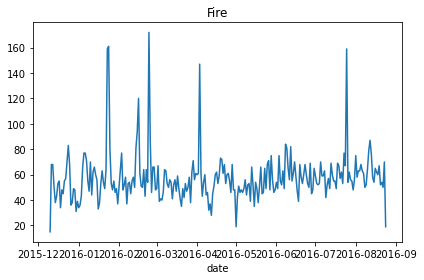

In [64]:
data[data['Reason'] == 'Fire'].groupby('date').count()['twp'].plot()
plt.title("Fire")
plt.tight_layout()

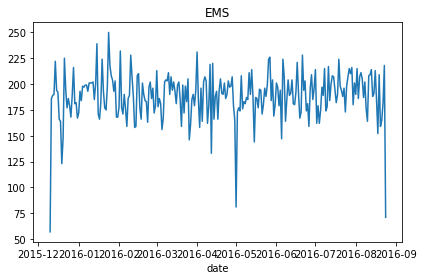

In [65]:
data[data['Reason'] == 'EMS'].groupby('date').count()['twp'].plot()
plt.title("EMS")
plt.tight_layout()

### Creating new dataFrame named dayHour by using groupby on the data where column becomes the Hours and index become Day of the Week

In [94]:
dayHour = data.groupby(by=['Day of Week', 'Hour']).count()['Reason'].unstack()
dayHour

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


### Creating HeatMap using seaborn for this new DataFrame

<AxesSubplot:xlabel='Hour', ylabel='Day of Week'>

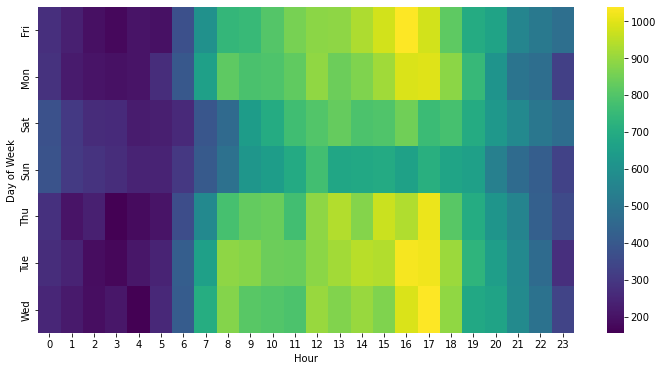

In [80]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour, cmap='viridis')

### Creating clustermap using seaborn for this new DataFrame

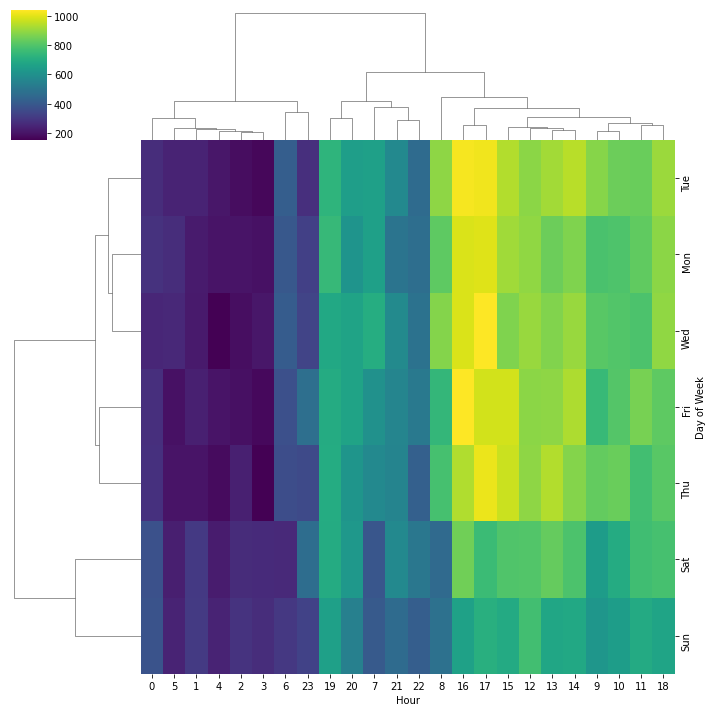

In [81]:
sns.clustermap(dayHour, cmap='viridis')

### Repeating the above step same but this time Month in the place of Hour

In [82]:
dayMonth = data.groupby(by=['Day of Week', 'Month']).count()['Reason'].unstack()

<AxesSubplot:xlabel='Month', ylabel='Day of Week'>

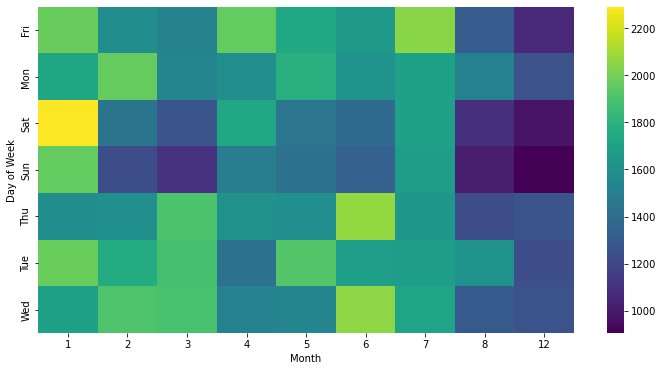

In [86]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth, cmap='viridis')

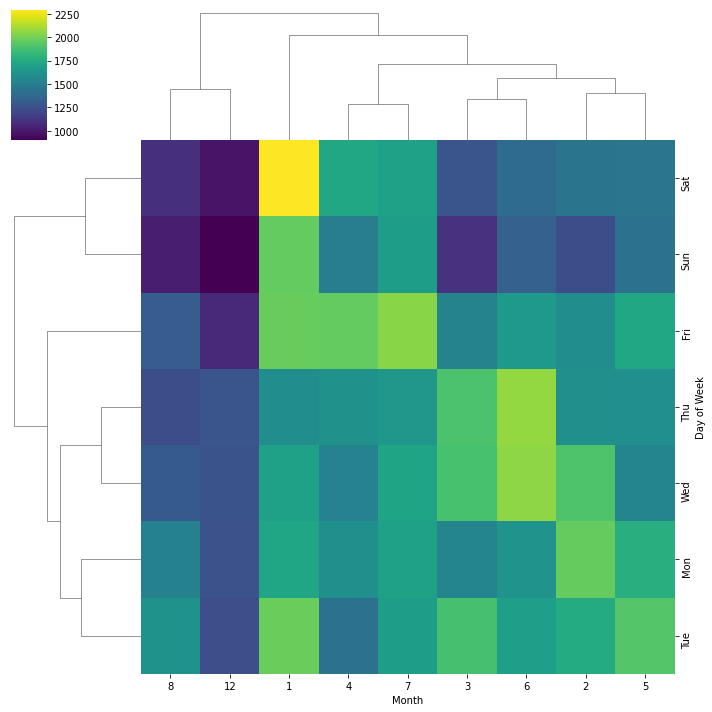

In [87]:
sns.clustermap(dayMonth,cmap='viridis')